In [1]:
import pandas as pd
salaries = pd.read_csv("salaries.csv")
salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Cyber Security Consultant,175000,USD,175000,US,100,US,L
1,2024,MI,CT,Vulnerability Management Engineer,50000,USD,50000,CR,0,CR,M
2,2024,MI,CT,Vulnerability Management Engineer,50000,USD,50000,CR,0,CR,M
3,2024,SE,FT,Security Engineer,238050,USD,238050,US,0,US,M
4,2024,SE,FT,Security Engineer,146200,USD,146200,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
6412,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
6413,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
6414,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
6415,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


In [2]:
# Details of dataframe and features
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417 entries, 0 to 6416
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           6417 non-null   int64 
 1   experience_level    6417 non-null   object
 2   employment_type     6417 non-null   object
 3   job_title           6417 non-null   object
 4   salary              6417 non-null   int64 
 5   salary_currency     6417 non-null   object
 6   salary_in_usd       6417 non-null   int64 
 7   employee_residence  6417 non-null   object
 8   remote_ratio        6417 non-null   int64 
 9   company_location    6417 non-null   object
 10  company_size        6417 non-null   object
dtypes: int64(4), object(7)
memory usage: 551.6+ KB


In [3]:
# Locating null value if there is any in the features to avoid errors
salaries.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
def bad_cha(file_name):   
    bad_c = ["(",")"," ","c",".","'","s""-","_"]
    count = 0   
    for cl in file_name: # iterate over each column of the file
        for char in cl: # iterate over each cell of the column
            if char in bad_c:
                count +=1
    return count

In [5]:
file_name = 'salaries'
bad_cha(file_name)

0

In [6]:
# We can further verify if our function is working properly or not 

l = "60'50"
bad_cha(l)

1

#### Let's draw some plots to find out the insights using the available data. 

In [7]:
# Importing the important libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

* We prefer salaries using log for better visibility due to larger ranges

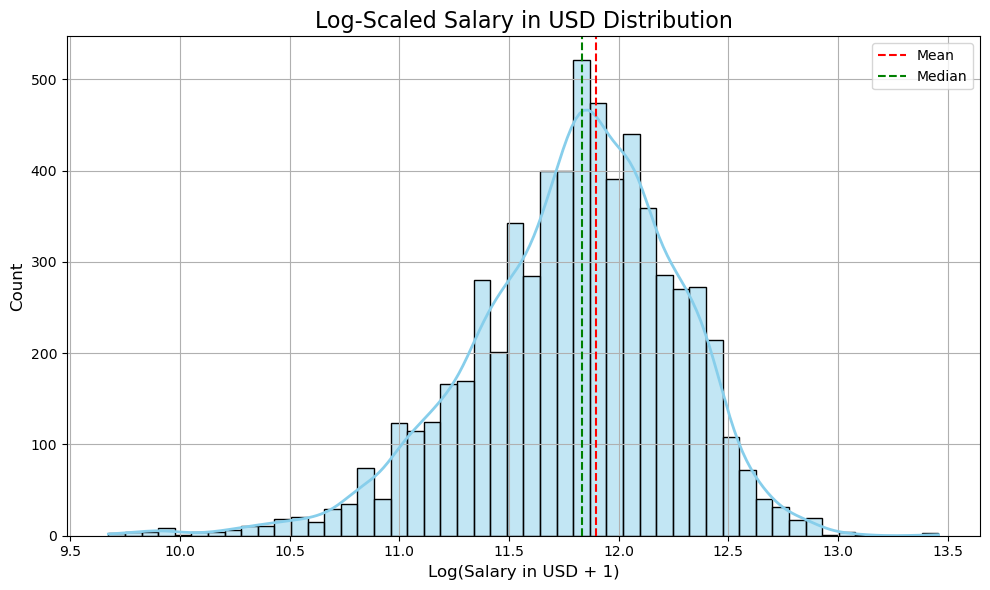

In [8]:
# Setting up Seaborn style
# Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(salaries["salary_in_usd"]), bins=50, kde=True, color="skyblue", line_kws={"linewidth": 2})
plt.axvline(np.log1p(salaries["salary_in_usd"].mean()), color='red', linestyle='--', label='Mean')
plt.axvline(np.log1p(salaries["salary_in_usd"].median()), color='green', linestyle='--', label='Median')
plt.title("Log-Scaled Salary in USD Distribution", fontsize=16)
plt.xlabel("Log(Salary in USD + 1)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

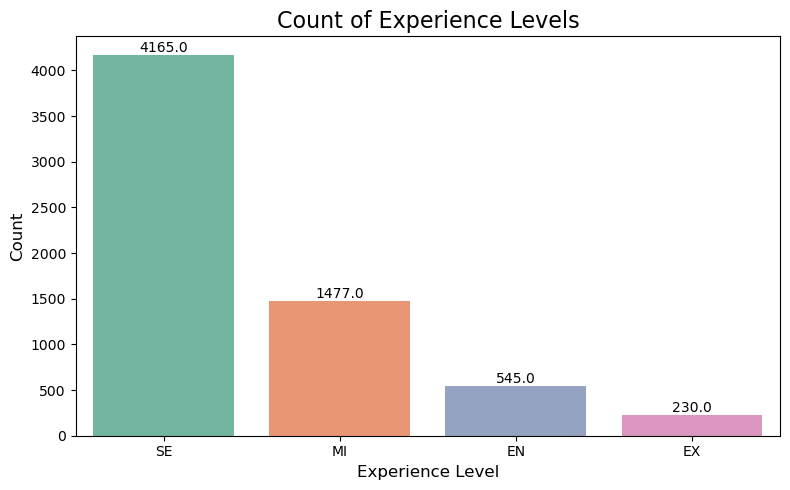

In [9]:
# 2. Count of Experience Levels
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=salaries, x="experience_level", palette="Set2",
                   order=salaries["experience_level"].value_counts().index)
plt.title("Count of Experience Levels", fontsize=16)
plt.xlabel("Experience Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

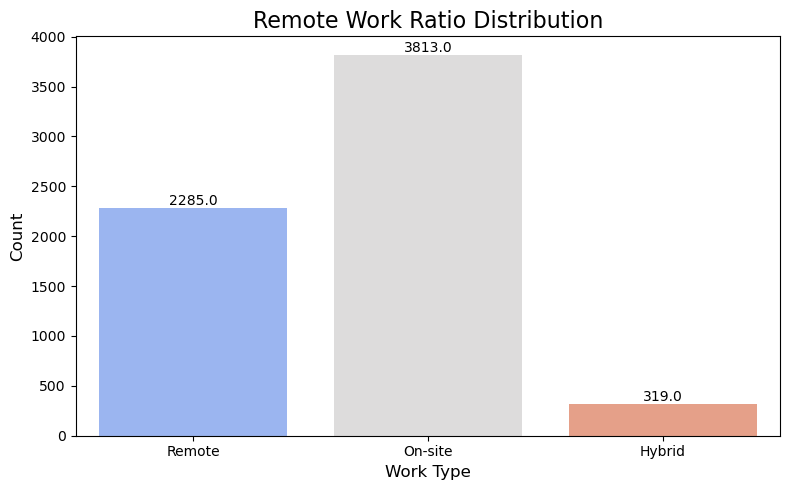

In [10]:
# 3. Remote Work Ratio Distribution
remote_map = {0: 'On-site', 50: 'Hybrid', 100: 'Remote'}
salaries['remote_label'] = salaries['remote_ratio'].map(remote_map)

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=salaries, x="remote_label", palette="coolwarm")
plt.title("Remote Work Ratio Distribution", fontsize=16)
plt.xlabel("Work Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

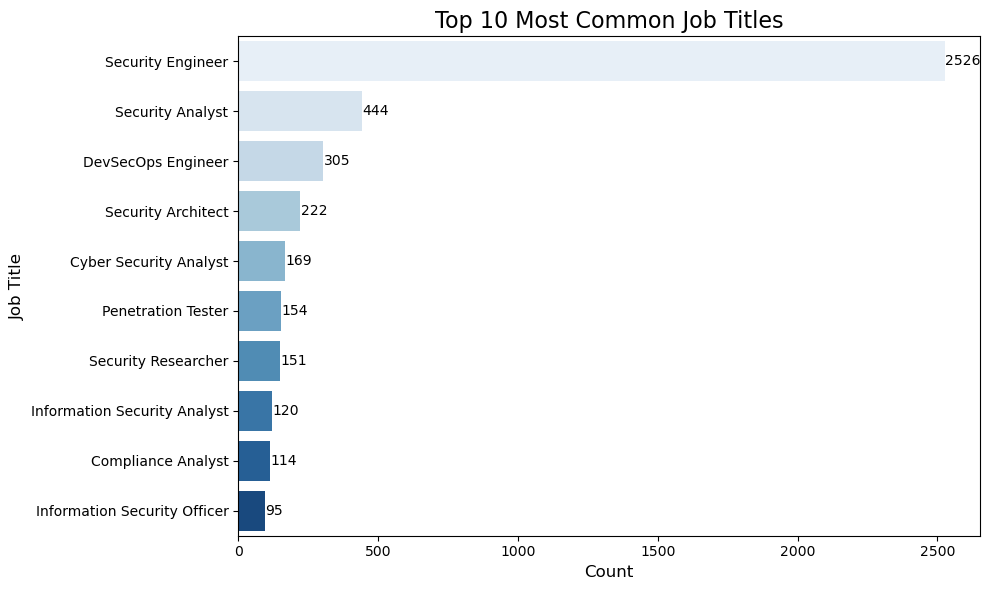

In [11]:
# 4. Top 10 Most Frequent Job Titles
top_jobs = salaries["job_title"].value_counts().nlargest(10)
colors = sns.color_palette("Blues", len(top_jobs))

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=top_jobs.index, x=top_jobs.values, palette=colors)
plt.title("Top 10 Most Common Job Titles", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Job Title", fontsize=12)
for i, v in enumerate(top_jobs.values):
    ax.text(v + 1, i, str(v), color='black', va='center', fontsize=10)
plt.tight_layout()
plt.show()


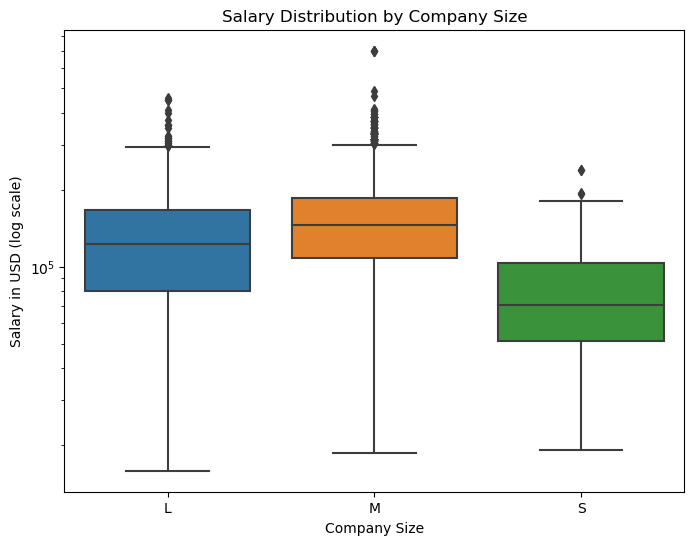

In [12]:
# 5. Boxplot of Salary by Company Size
plt.figure(figsize=(8, 6))
sns.boxplot(data=salaries, x="company_size", y="salary_in_usd")
plt.yscale("log")  # log scale helps compare large ranges
plt.title("Salary Distribution by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Salary in USD (log scale)")
plt.show()

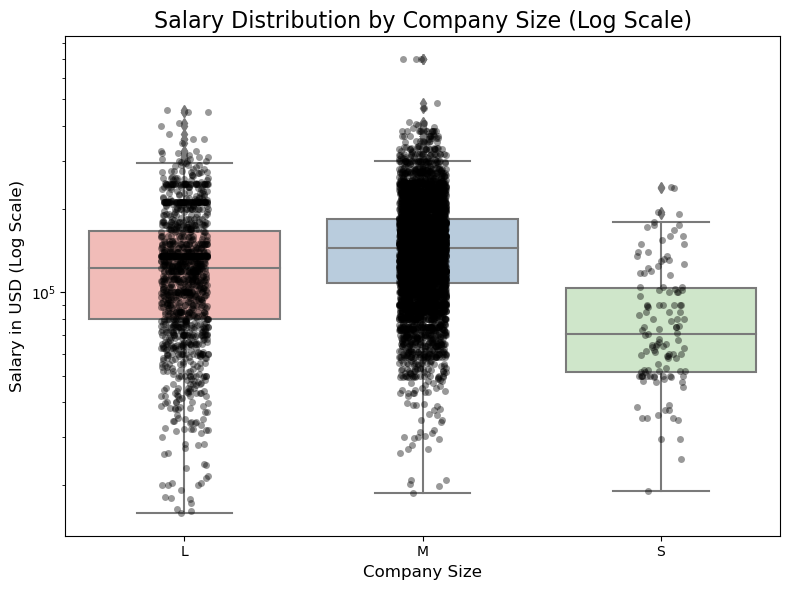

In [13]:
#salary distribution by company size
plt.figure(figsize=(8, 6))
sns.boxplot(data=salaries, x="company_size", y="salary_in_usd", palette="Pastel1")
sns.stripplot(data=salaries, x="company_size", y="salary_in_usd", color='black', alpha=0.4, jitter=True)
plt.yscale("log")
plt.title("Salary Distribution by Company Size (Log Scale)", fontsize=16)
plt.xlabel("Company Size", fontsize=12)
plt.ylabel("Salary in USD (Log Scale)", fontsize=12)
plt.tight_layout()
plt.show()


### Lets Prepare data for the ML model

In [14]:
# Making a working copy
data = salaries.copy()

# Drop out unnecessary columns, we already have a features provinding conversion of salaries in usd. 
data.drop(columns=['salary', 'salary_currency'], inplace=True)

* Dropping out the extreme values to train model for better result. 

In [15]:
Q1 = data['salary_in_usd'].quantile(0.25)
Q3 = data['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Keep only rows within 1.5 * IQR to avoid extreme values for better model predictions
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
data = data[(data['salary_in_usd'] >= lower) & (data['salary_in_usd'] <= upper)]


In [16]:
# Converting textual values of the features into binary for understanding of ML model.

categorical_columns = ['experience_level', 'employment_type', 'job_title','employee_residence', 'company_location', 'company_size']

# Drop remote_label to avoid model input errors

data.drop(columns=['remote_label'], inplace=True)

# One-hot encode the columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [17]:
print(len(data_encoded))
data_encoded.head(10)


6296


,work_year,salary_in_usd,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_Application Security Architect,...,company_location_SE,company_location_SG,company_location_SI,company_location_TR,company_location_UM,company_location_US,company_location_VN,company_location_ZA,company_size_M,company_size_S
0,2024,175000,100,False,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2024,50000,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2024,50000,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2024,238050,0,False,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
4,2024,146200,0,False,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
5,2024,130000,0,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
6,2024,100000,0,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
7,2024,138000,0,False,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
8,2024,86000,0,False,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
9,2024,62000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False


### Importing necessary libararies for ML Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
# Define features and target
X = data_encoded.drop(columns=['salary_in_usd'])  # features
y = data_encoded['salary_in_usd']                 # target

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
# Prediction
y_pred = model.predict(X_test)

Model Evaluation:
Mean Absolute Error (MAE): $36,121.55
Root Mean Squared Error (RMSE): $46,064.51
R-squared (R² Score): 0.3224


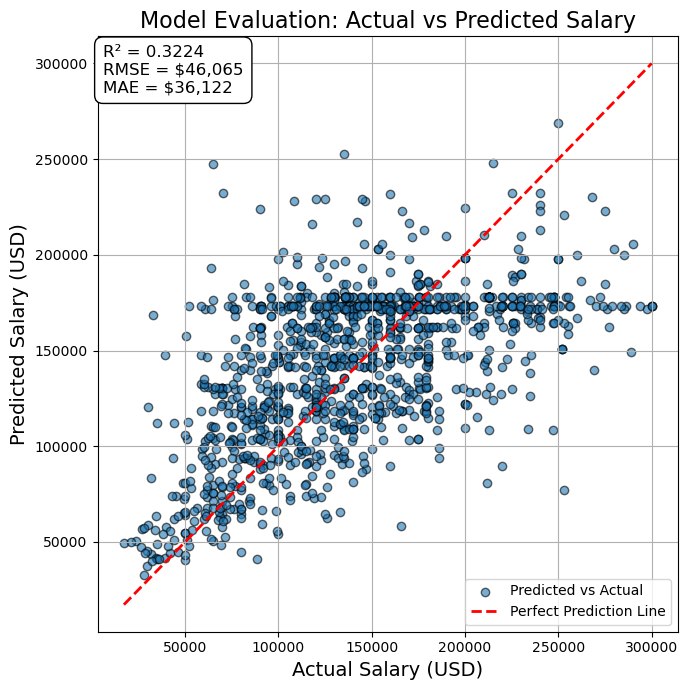

In [23]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R² Score): {r2:.4f}")

# Create the plot
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Titles and labels
plt.title('Model Evaluation: Actual vs Predicted Salary', fontsize=16)
plt.xlabel('Actual Salary (USD)', fontsize=14)
plt.ylabel('Predicted Salary (USD)', fontsize=14)

# Move legend to bottom-right
plt.legend(loc='lower right')
plt.grid(True)

# Add evaluation metrics as a box in the top-left corner
plt.text(x=y_test.max()*0.02, y=y_test.max()*0.95,
         s=f'R² = {r2:.4f}\nRMSE = ${rmse:,.0f}\nMAE = ${mae:,.0f}',
         fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()


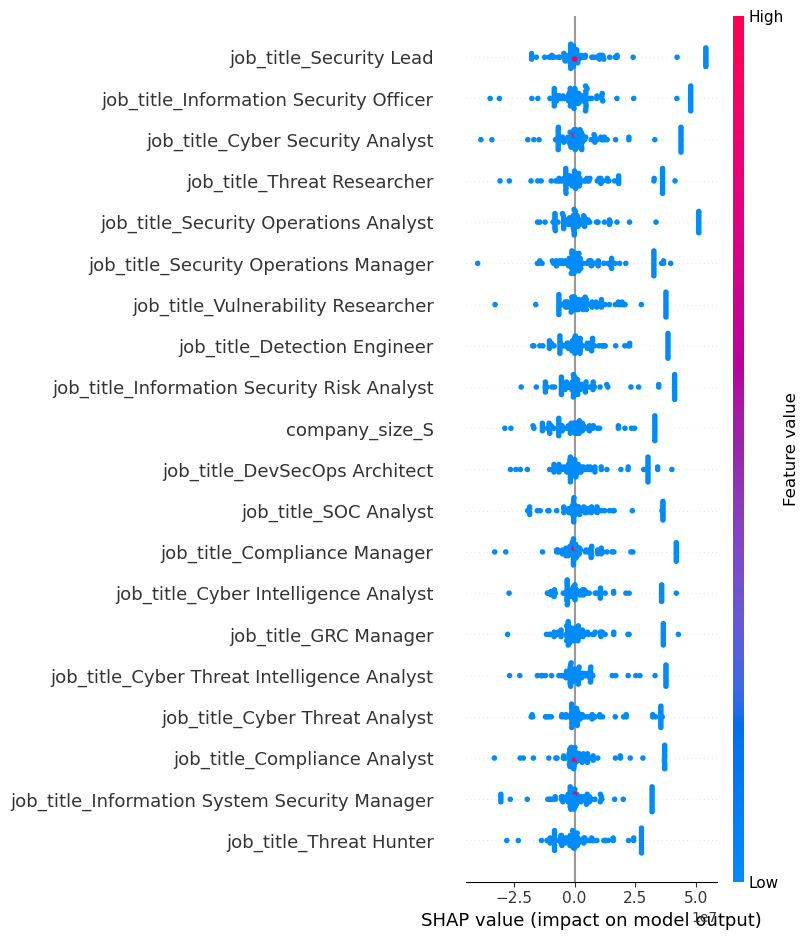

In [24]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(model)
# Pick a small sample from the test set
X_sample = X_test.sample(100, random_state=42)
shap_values = explainer.shap_values(X_sample, check_additivity=False)
# Plot summary
shap.summary_plot(shap_values, X_sample)

In [25]:
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output
import plotly.graph_objs as go
import pandas as pd

# Prepare job-level comparison DataFrame
comparison_df = pd.DataFrame({
    'Job Title': data.loc[X_test.index, 'job_title'].values,
    'Actual Salary': y_test.values,
    'Predicted Salary': y_pred
})

# Grouped averages for all jobs
avg_salary_comparison = comparison_df.groupby("Job Title").agg({
    "Actual Salary": "mean",
    "Predicted Salary": "mean"
}).reset_index()

# Remote work ratio data
remote_df = data[["job_title", "salary_in_usd", "remote_ratio"]].copy()

# Create the app
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("Salary Model Dashboard", style={'textAlign': 'center'}),
    dcc.Tabs([
        dcc.Tab(label='Model Evaluation', children=[
            dcc.Graph(
                figure=go.Figure([
                    go.Scatter(
                        x=y_test,
                        y=y_pred,
                        mode='markers',
                        marker=dict(size=6, opacity=0.6, color='blue'),
                        name='Predicted vs Actual'
                    ),
                    go.Scatter(
                        x=[y_test.min(), y_test.max()],
                        y=[y_test.min(), y_test.max()],
                        mode='lines',
                        line=dict(color='red', dash='dash'),
                        name='Perfect Prediction Line'
                    )
                ]).update_layout(
                    title='Model Evaluation: Actual vs Predicted Salary',
                    xaxis_title='Actual Salary (USD)',
                    yaxis_title='Predicted Salary (USD)',
                    legend=dict(x=0.75, y=0.1),
                    annotations=[dict(
                        xref='paper', yref='paper',
                        x=0.02, y=0.98,
                        text=f"R² = {r2:.4f}<br>RMSE = ${rmse:,.0f}<br>MAE = ${mae:,.0f}",
                        showarrow=False,
                        font=dict(size=12),
                        align='left',
                        bordercolor='black',
                        borderwidth=1,
                        borderpad=5,
                        bgcolor='white',
                    )]
                )
            )
        ]),
        dcc.Tab(label='Actual vs Predicted by Job Title', children=[
            html.H4("Grouped View (All Job Titles)"),
            dcc.Graph(
                figure=go.Figure([
                    go.Bar(x=avg_salary_comparison["Job Title"], y=avg_salary_comparison["Actual Salary"],
                           name="Actual", marker_color="steelblue"),
                    go.Bar(x=avg_salary_comparison["Job Title"], y=avg_salary_comparison["Predicted Salary"],
                           name="Predicted", marker_color="orange")
                ]).update_layout(
                    title="Average Actual vs Predicted Salary by Job Title",
                    barmode="group",
                    margin=dict(b=200),
                    height=600,
                    xaxis_title="Job Title",
                    yaxis_title="Salary (USD)"
                )
            ),
            html.H4("Select a Specific Job Title"),
            dcc.Dropdown(
                id='job-dropdown',
                options=[{'label': jt, 'value': jt} for jt in avg_salary_comparison["Job Title"]],
                value=avg_salary_comparison["Job Title"].iloc[0],
                style={'width': '50%'}
            ),
            dcc.Graph(id='single-job-graph')
        ]),
        dcc.Tab(label='Remote Ratio vs Salary', children=[
            html.H4("Select a Job Title"),
            dcc.Dropdown(
                id='remote-job-dropdown',
                options=[{'label': jt, 'value': jt} for jt in sorted(remote_df["job_title"].unique())],
                value=sorted(remote_df["job_title"].unique())[0],
                style={'width': '50%'}
            ),
            dcc.Graph(id='remote-salary-graph')
        ])
    ])
])

# Callbacks
@app.callback(
    Output('single-job-graph', 'figure'),
    Input('job-dropdown', 'value')
)
def update_job_salary_graph(job):
    row = avg_salary_comparison[avg_salary_comparison["Job Title"] == job].iloc[0]
    return {
        'data': [
            go.Bar(x=["Actual Salary"], y=[row["Actual Salary"]], name='Actual', marker_color='steelblue'),
            go.Bar(x=["Predicted Salary"], y=[row["Predicted Salary"]], name='Predicted', marker_color='orange')
        ],
        'layout': go.Layout(
            title=f"Actual vs Predicted Salary for {job}",
            yaxis=dict(title='Salary (USD)'),
            barmode='group'
        )
    }

@app.callback(
    Output('remote-salary-graph', 'figure'),
    Input('remote-job-dropdown', 'value')
)
def update_remote_plot(job):
    subset = remote_df[remote_df["job_title"] == job]
    return {
        'data': [
            go.Scatter(
                x=subset["remote_ratio"],
                y=subset["salary_in_usd"],
                mode='markers',
                marker=dict(size=8, opacity=0.7, color='blue')
            )
        ],
        'layout': go.Layout(
            title=f"Remote Ratio vs Salary for {job}",
            xaxis=dict(title='Remote Work (%)'),
            yaxis=dict(title='Salary (USD)')
        )
    }

app.run(mode='inline', port = 8052)


C:\Users\hafee\anaconda3\Lib\site-packages\dash\dash.py:634: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.

